# EchoPro Python Workflow <a class="tocSkip">

# Import libraries and configure the Jupyter notebook

In [1]:
import matplotlib.pyplot as plt

# Python EchoPro
import EchoPro

# Allows us to grab the SemiVariogram class so we can use its models
from EchoPro.computation import SemiVariogram as SV

# obtain all visualization routines
from EchoPro.visualization import plot_layered_points, plot_kriging_results

# Allows us to easily use matplotlib widgets in our Notebook
%matplotlib widget

EchoPro.__version__

'0.2.0'

# Set up  EchoPro for a specific survey year

## Initialize EchoPro object  using configuration files

* `initialization_config.yml` -- parameters independent of survey year
* `survey_year_2019_config.yml` -- parameters specific to survey year
* `source` -- Define the region of data to use e.g. US, CAN, US & CAN
* `exclude_age1` -- States whether age 1 hake should be included in analysis.

In [2]:
%%time
survey_2019 = EchoPro.Survey(init_file_path='../config_files/initialization_config.yml',
                             survey_year_file_path='../config_files/survey_year_2019_config.yml',
                             source=3, 
                             exclude_age1=True)

A full check of the initialization file contents needs to be done!
A check of the survey year file contents needs to be done!
CPU times: user 8.89 ms, sys: 842 µs, total: 9.74 ms
Wall time: 9.52 ms


## Load and process input data 
* This data is stored in `survey_2019`

In [3]:
%%time 
survey_2019.load_survey_data() #file_type='biological')

CPU times: user 1.71 s, sys: 20.3 ms, total: 1.73 s
Wall time: 1.75 s


In [4]:
survey_2019.specimen_df.head()

sex  length  weight  age
haul_num                          
1           1    24.0    0.08  1.0
1           1    23.0    0.06  1.0
1           1    22.0    0.06  1.0
1           1    21.0    0.06  1.0
1           2    22.0    0.06  1.0

## Compute the areal biomass density
* The areal biomass density is stored in `survey_2019.bio_calc.transect_results_gdf` as `biomass_density_adult`

In [5]:
%%time
survey_2019.compute_biomass_density()

CPU times: user 1.26 s, sys: 4.69 ms, total: 1.27 s
Wall time: 1.27 s


In [6]:
survey_2019.bio_calc.transect_results_gdf.head()

latitude   longitude  stratum_num  transect_spacing  \
transect_num                                                         
1             34.397267 -121.143005            1              10.0   
1             34.397391 -121.133196            1              10.0   
1             34.397435 -121.123057            1              10.0   
1             34.397394 -121.112871            1              10.0   
1             34.397437 -121.102888            1              10.0   

              numerical_density  numerical_density_male  \
transect_num                                              
1                           0.0                     0.0   
1                           0.0                     0.0   
1                           0.0                     0.0   
1                           0.0                     0.0   
1                           0.0                     0.0   

              numerical_density_female  numerical_density_adult  \
transect_num                                                      
1                                  0.0                      0.0   
1                                  0.0                      0.0   
1                                  0.0                      0.0   
1                                  0.0                      0.0   
1                                  0.0                      0.0   

              biomass_density_male  biomass_density_female  ...  \
transect_num                                                ...   
1                              0.0                     0.0  ...   
1                              0.0                     0.0  ...   
1                              0.0                     0.0  ...   
1                              0.0                     0.0  ...   
1                              0.0                     0.0  ...   

              abundance_adult_male  abundance_adult_female  abundance_adult  \
transect_num                                                                  
1                              0.0                     0.0              0.0   
1                              0.0                     0.0              0.0   
1                              0.0                     0.0              0.0   
1                              0.0                     0.0              0.0   
1                              0.0                     0.0              0.0   

              biomass_female  biomass_male  biomass  biomass_adult_female  \
transect_num                                                                
1                        0.0           0.0      0.0                   0.0   
1                        0.0           0.0      0.0                   0.0   
1                        0.0           0.0      0.0                   0.0   
1                        0.0           0.0      0.0                   0.0   
1                        0.0           0.0      0.0                   0.0   

              biomass_adult_male  biomass_adult                     geometry  
transect_num                                                                  
1                            0.0            0.0  POINT (-121.14301 34.39727)  
1                            0.0            0.0  POINT (-121.13320 34.39739)  
1                            0.0            0.0  POINT (-121.12306 34.39744)  
1                            0.0            0.0  POINT (-121.11287 34.39739)  
1                            0.0            0.0  POINT (-121.10289 34.39744)  

[5 rows x 27 columns]

In [7]:
print(f"Total Biomass Estimate without Kriging: {1e-6*survey_2019.bio_calc.transect_results_gdf.biomass_adult.sum():.3f} kmt")

Total Biomass Estimate without Kriging: 1643.221 kmt


In [8]:
survey_2019.bio_calc.weight_fraction_all_ages_female_df

age_bin_1  age_bin_2  age_bin_3  age_bin_4  age_bin_5  age_bin_6  \
stratum_num                                                                     
1                  0.0   1.000000   0.000000   0.000000   0.000000   0.000000   
2                  0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
3                  0.0   0.302358   0.060822   0.074714   0.276092   0.071795   
4                  0.0   0.558787   0.153460   0.014463   0.164463   0.069946   
0                  0.0   0.028025   0.037743   0.011331   0.111638   0.090326   
5                  0.0   0.042166   0.261075   0.008725   0.360566   0.037478   
6                  0.0   0.233215   0.584014   0.031916   0.016098   0.036219   
7                  0.0   0.005683   0.042891   0.043412   0.204548   0.053850   
8                  0.0   0.000000   0.000000   0.000000   0.184509   0.000000   

             age_bin_7  age_bin_8  age_bin_9  age_bin_10  age_bin_11  \
stratum_num                                                            
1             0.000000   0.000000   0.000000    0.000000    0.000000   
2             0.000000   0.000000   0.000000    0.000000    0.000000   
3             0.000000   0.000000   0.214219    0.000000    0.000000   
4             0.000000   0.000000   0.038880    0.000000    0.000000   
0             0.000000   0.024719   0.600931    0.049679    0.000000   
5             0.037952   0.033652   0.157734    0.025589    0.010968   
6             0.036259   0.000000   0.062278    0.000000    0.000000   
7             0.088201   0.054339   0.359569    0.057799    0.025403   
8             0.058871   0.062249   0.409561    0.056464    0.105748   

             age_bin_12  age_bin_13  age_bin_14  age_bin_15  age_bin_16  \
stratum_num                                                               
1              0.000000    0.000000    0.000000    0.000000         0.0   
2              0.000000    0.000000    0.000000    0.000000         0.0   
3              0.000000    0.000000    0.000000    0.000000         0.0   
4              0.000000    0.000000    0.000000    0.000000         0.0   
0              0.021009    0.000000    0.000000    0.000000         0.0   
5              0.002803    0.006008    0.008151    0.003807         0.0   
6              0.000000    0.000000    0.000000    0.000000         0.0   
7              0.022195    0.000000    0.007702    0.019817         0.0   
8              0.000000    0.020398    0.075045    0.027155         0.0   

             age_bin_17  age_bin_18  age_bin_19  age_bin_20  
stratum_num                                                  
1              0.000000    0.000000         0.0    0.000000  
2              0.000000    0.000000         0.0    0.000000  
3              0.000000    0.000000         0.0    0.000000  
4              0.000000    0.000000         0.0    0.000000  
0              0.000000    0.000000         0.0    0.024598  
5              0.003328    0.000000         0.0    0.000000  
6              0.000000    0.000000         0.0    0.000000  
7              0.000000    0.007279         0.0    0.007311  
8              0.000000    0.000000         0.0    0.000000

In [36]:
survey_2019.bio_calc.transect_results_gdf["biomass_adult_female"].sum()
# survey_2019.bio_calc.transect_results_gdf["biomass_adult"].sum()

# survey_2019.bio_calc.transect_results_gdf["biomass_adult_female"].iloc[734:738]

827732084.0455462

In [37]:
biomass_df = survey_2019.bio_calc.transect_results_gdf["biomass_adult_female"]
stratum_num = survey_2019.bio_calc.transect_results_gdf["stratum_num"]

In [38]:
for i in survey_2019.bio_calc.weight_fraction_all_ages_df:

    expanded_age_bin = survey_2019.bio_calc.weight_fraction_all_ages_female_df[i].loc[stratum_num.values]

    biomass_age_bin = biomass_df*expanded_age_bin.values

0.0
53123086.74514268
203861511.0521353
11060235.335963305
260991816.8094017
31978150.977838892
34525553.056467816
27689146.127220053
145877181.2686696
22523112.542441286
12117438.32621361
3436367.986512852
4513667.931892069
8087808.903993119
4721819.508572314
0.0
2164986.7888201918
528917.0824384802
0.0
531283.6018229926


# Jolly-Hampton CV Analysis

* Compute the mean of the Jolly-Hampton CV value on data that has not been Kriged
* Note: the algorithm used to compute this value is random in nature

In [35]:
%%time
CV_JH_mean = survey_2019.run_cv_analysis(kriged_data=False)

CPU times: user 155 ms, sys: 2.95 ms, total: 158 ms
Wall time: 156 ms


In [13]:
print(f"Mean Jolly-Hampton CV: {CV_JH_mean:.4f}")

Mean Jolly-Hampton CV: 0.1328


# Obtain Kriging Mesh Data

## Access Kriging mesh object
* Reads mesh data files specified by `survey_2019` 

In [14]:
krig_mesh = survey_2019.get_kriging_mesh()

### Plot the transects and smoothed isobath contour, and optionally the mesh points

* `plot_layered_points` generates an interactive map using the Folium package
* Transect points are represented by a changing color gradient
* Smoothed contour points (200m isobath) are in blue 
* Here we choose not to plot the mesh points to prevent this notebook from getting too big. To plot the mesh points, omit the `plot_mesh_points` argument or use `plot_mesh_points=True`. Mesh points will be in gray

In [15]:
fmap = plot_layered_points(krig_mesh, plot_mesh_points=False)

In [16]:
fmap

## Apply coordinate transformations
* Longitude transformation
* Lat/Lon to distance

### Transect points

In [17]:
krig_mesh.apply_coordinate_transformation(coord_type='transect')

### Mesh points

In [18]:
krig_mesh.apply_coordinate_transformation(coord_type='mesh')

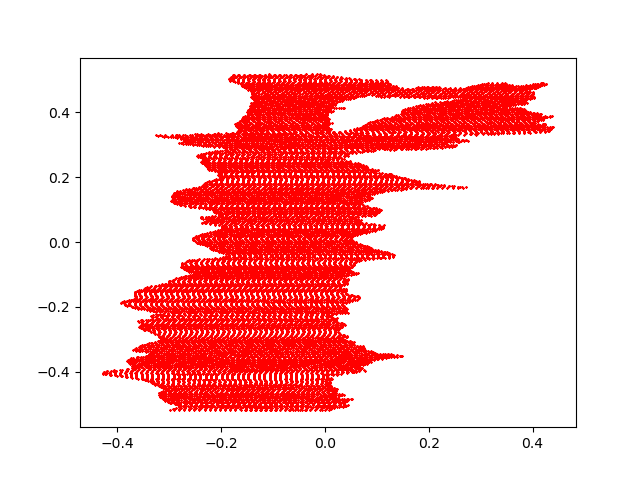

In [19]:
# plot the transformed mesh points 
plt.plot(krig_mesh.transformed_mesh_df.x_mesh, 
         krig_mesh.transformed_mesh_df.y_mesh, 'r*', markersize=1.25)
plt.show()

# Compute biomass density Semi-Variogram and fit a model

* Compute the normalized semi-variogram using the areal biomass density
* Fit a model to the semi-variogram values

## Compute the semi-variogram

### Initialize semi-variogram calculation
* Transformed transect points
* Parameters specific to semi-variogram algorithm

In [20]:
semi_vario = survey_2019.get_semi_variogram(
    krig_mesh,
    params=dict(nlag=30, lag_res=0.002)
)

### Compute the normalized semi-variogram

In [21]:
%%time
semi_vario.calculate_semi_variogram()

CPU times: user 2.46 s, sys: 3.75 s, total: 6.21 s
Wall time: 4.68 s


## Fit a model to the semi-variogram

* A widget to easily fit the model

In [22]:
semi_vario.get_widget()

GridspecLayout(children=(Dropdown(description='Semi-variogram model', index=1, layout=Layout(grid_area='widget…

# Perform Ordinary Kriging of biomass density

* transformed mesh points
* semi-variogram model
* areal biomass density 

## Initialize Kriging routine

In [23]:
kriging_params = dict(
    # kriging parameters
    k_max=10,
    k_min=3,
    R=0.0226287,
    ratio=0.001,
    
    # parameters for semi-variogram model
    s_v_params={'nugget': 0.0, 'sill': 0.95279, 'ls': 0.0075429,
                'exp_pow': 1.5, 'ls_hole_eff': 0.0},
    
    # grab appropriate semi-variogram model
    s_v_model=SV.generalized_exp_bessel
)

# uncomment to use widget values 
# kriging_params.update(semi_vario.get_params_for_kriging())

# initalize kriging routine
krig = survey_2019.get_kriging(kriging_params)

## Perform Kriging

* Generates total biomass at mesh points
* Computes the total biomass estimate of Kriging output in kmt, where kmt is $10^3$ metric tons, which is equivalent to $10^6$ kg

In [24]:
%%time
krig.run_biomass_kriging(krig_mesh)

CPU times: user 5.18 s, sys: 4.74 s, total: 9.92 s
Wall time: 6.96 s


In [25]:
krig_results = survey_2019.bio_calc.kriging_results_gdf

Convert from kg to kmt

In [26]:
krig_results.biomass_adult = 1e-6 * krig_results.biomass_adult

In [27]:
print(f"Total Kriged Biomass Estimate: {krig_results.biomass_adult.sum():.3f} kmt")

Total Kriged Biomass Estimate: 1725.033 kmt


## Plot Kriged Biomass estimate in kmt

Here we use the argument `greater_than_0=True` to limit the mesh biomass points that are plotted to ones with biomass value > 0, to prevent this notebook from getting too big. To plot all mesh points, omit the `greater_than_0` argument or use `greater_than_0=False`.

In [28]:
plot_kriging_results(krig_results, krig_field_name="biomass_adult", greater_than_0=True)